### 1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [1]:
# Mengimpor library numpy untuk operasi numerik
import numpy as np

# Mengimpor library pandas untuk analisis data menggunakan DataFrame
import pandas as pd

# Mengimpor library matplotlib.pyplot untuk visualisasi data
import matplotlib.pyplot as plt

# Mengimpor library seaborn (sns) untuk visualisasi data statistik yang lebih menarik
import seaborn as sns

In [2]:
# baca data dari file CSV
df = pd.read_csv('../data/insurance.csv')

d:\anaconda\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


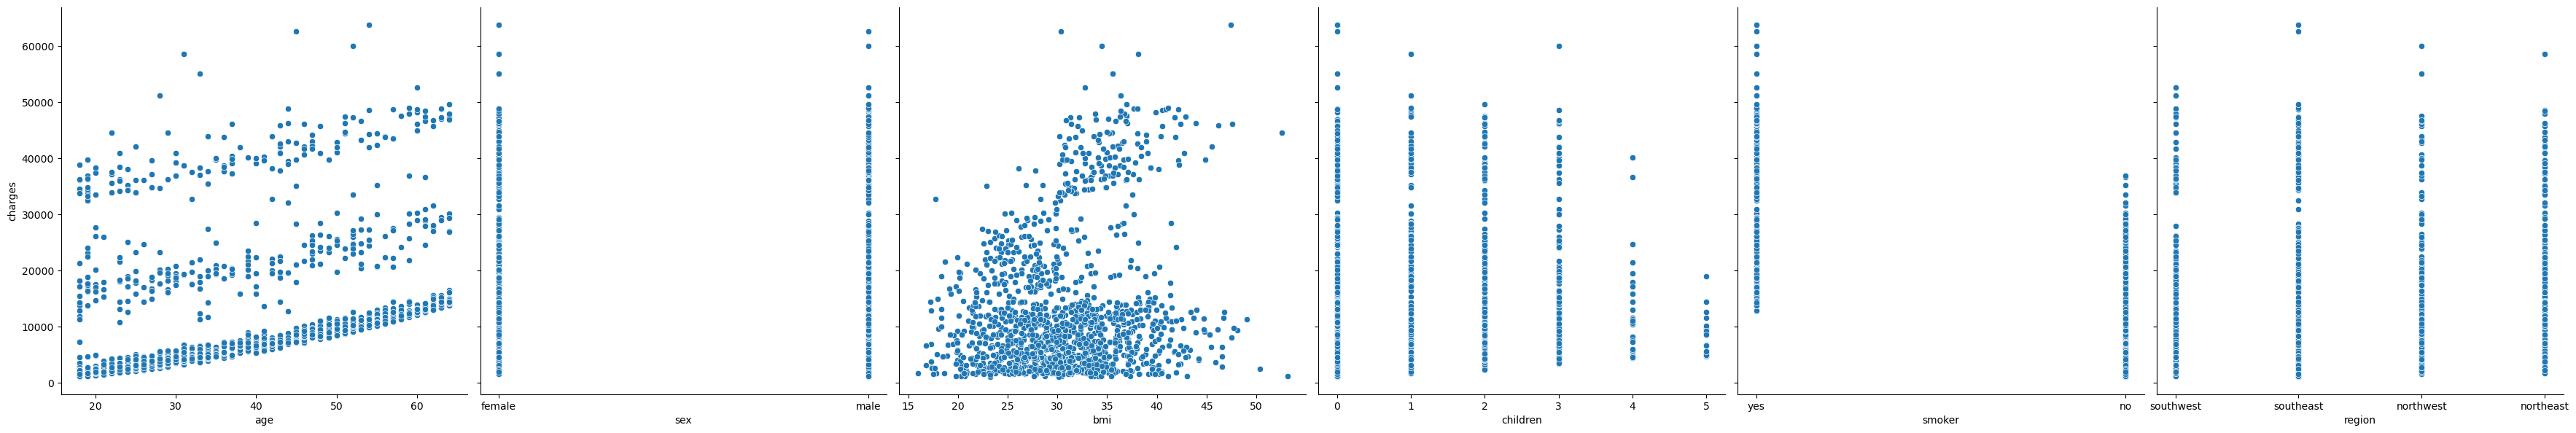

In [3]:
# Visualisasi data dengan pairplot
# Menggunakan library Seaborn (sns) untuk membuat pairplot
# Data yang digunakan berasal dari DataFrame "df"
# Variabel pada sumbu x adalah 'age', 'sex', 'bmi', 'children', 'smoker', 'region'
# Variabel pada sumbu y adalah 'charges' (biaya asuransi)
# Ukuran grafik disetel ke 6, dengan aspek 1, dan jenis plot adalah 'scatter' (pencar)
sns.pairplot(df, x_vars=['age', 'sex', 'bmi', 'children', 'smoker', 'region'],
             y_vars='charges', size=6, aspect=1, kind='scatter')

# Menampilkan grafik pairplot
plt.show()


C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_21552\3734130516.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


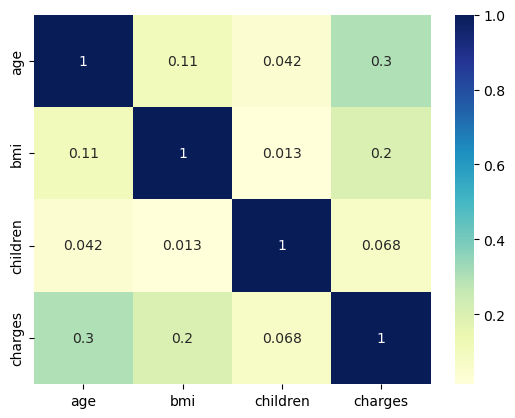

In [4]:
# Visualisasi korelasi antara variabel-variabel dalam dataset dengan heatmap
# Menggunakan library Seaborn (sns) untuk membuat heatmap
# Data yang digunakan berasal dari DataFrame "df"
# 'df.corr()' menghasilkan matriks korelasi antara variabel-variabel
# 'cmap' digunakan untuk mengatur skema warna, dalam hal ini "YlGnBu" (kuning ke biru)
# 'annot=True' digunakan untuk menampilkan nilai korelasi dalam sel-sel heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# Menampilkan heatmap
plt.show()


### 2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [5]:
# Membuat variabel bebas (X) dan variabel terikat (y) berdasarkan hasil analisis korelasi sebelumnya
# Variabel bebas (X) adalah 'age' (usia)
# Variabel terikat (y) adalah 'charges' (biaya asuransi)
X = df['age']
y = df['charges']

In [6]:
# Mengimpor train_test_split dari library sklearn.model_selection
from sklearn.model_selection import train_test_split

# Melakukan pembagian data menjadi data latih dan data uji
# Variabel bebas (X) dan variabel terikat (y) dibagi dengan proporsi 7:3
# train_size=0.7 berarti 70% data akan digunakan sebagai data latih
# test_size=0.3 berarti 30% data akan digunakan sebagai data uji
# random_state=100 digunakan untuk mengatur seed agar hasil pembagian dapat direproduksi
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [7]:
# Mengimpor library statsmodels dengan alias sm
import statsmodels.api as sm

# Menambahkan konstanta ke data latih (X_train)
X_train_sm = sm.add_constant(X_train)

# Membuat model regresi linear menggunakan Ordinary Least Squares (OLS)
# Variabel terikat (y_train) akan digunakan untuk melatih model
# Hasil model akan disimpan dalam variabel 'lr'
lr = sm.OLS(y_train, X_train_sm).fit()


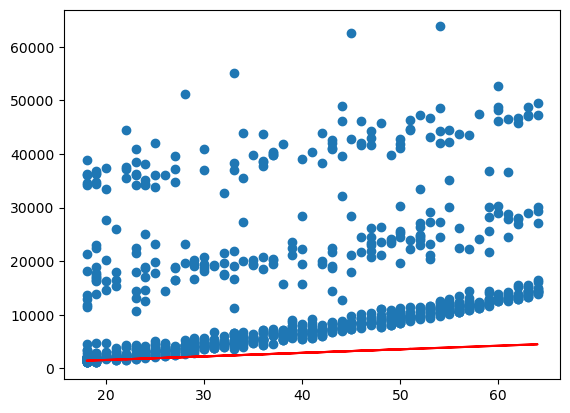

Jumlah data latih :  936
Jumlah data uji :  402


In [8]:
# Membuat scatter plot dari data latih (X_train dan y_train)
plt.scatter(X_train, y_train)

# Membuat garis regresi linear dengan persamaan: y = 265.2483 + 66.3015*X_train
# Garis regresi ini adalah hasil dari model regresi linear yang telah dilatih sebelumnya
# 'r' digunakan untuk mengatur warna garis menjadi merah
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')

# Menampilkan plot
plt.show()

# Menampilkan jumlah baris dalam setiap subset (data latih dan data uji)
print('Jumlah data latih : ', len(X_train))
print('Jumlah data uji : ', len(X_test))


### 3. Lakukan feature scaling jika diperlukan.

In [17]:
# Mengimpor StandardScaler dari sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Inisialisasi objek StandardScaler
sc_X = StandardScaler()

# Melakukan Feature Scaling pada data latih (X_train)
# X_train.values.reshape(-1, 1) digunakan untuk mengubah bentuk data menjadi matriks 2D yang diperlukan oleh StandardScaler
X_train_scaled = sc_X.fit_transform(X_train.values.reshape(-1, 1))

# Melakukan Feature Scaling pada data uji (X_test)
# X_test.values.reshape(-1, 1) digunakan untuk mengubah bentuk data menjadi matriks 2D yang diperlukan oleh StandardScaler
X_test_scaled = sc_X.transform(X_test.values.reshape(-1, 1))


### 4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [18]:
# Mengimpor kelas LinearRegression dari sklearn.linear_model
from sklearn.linear_model import LinearRegression

# Membuat objek model Regresi Linear
model = LinearRegression()


### 5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [22]:
# Melatih model Regresi Linear dengan data latih yang telah diubah oleh StandardScaler (X_train_scaled)
model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data uji (X_test yang telah diubah)
y_pred = model.predict(X_test_scaled)

### 6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [23]:
# Mengimpor metrik evaluasi dari library sklearn.metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Menghitung R-squared (Koefisien Determinasi)
r2 = r2_score(y_test, y_pred)

# Menghitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Menampilkan hasil evaluasi
print("MSE : ", mse)
print("MAE : ", mae)
print("R-squared : ", r2)
print("RMSE : ", rmse)


MSE :  134798778.0695984
MAE :  9031.799151222724
R-squared :  0.07161898944046363
RMSE :  11610.287596334485


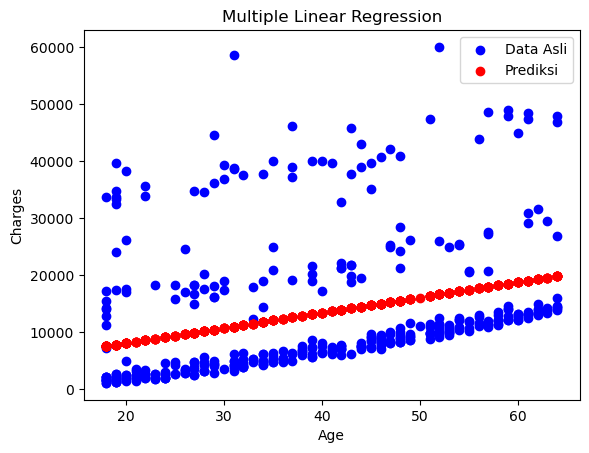

In [24]:
# Membuat scatter plot data asli (biru) dan hasil prediksi (merah) terhadap variabel 'age'
plt.scatter(X_test, y_test, color='blue', label='Data Asli')
plt.scatter(X_test, y_pred, color='red', label='Prediksi')

# Menambahkan label sumbu x ("Age") dan sumbu y ("Charges")
plt.xlabel("Age")
plt.ylabel("Charges")

# Menambahkan judul plot
plt.title("Multiple Linear Regression")

# Menambahkan legenda untuk data asli dan hasil prediksi
plt.legend()

# Menampilkan plot
plt.show()
